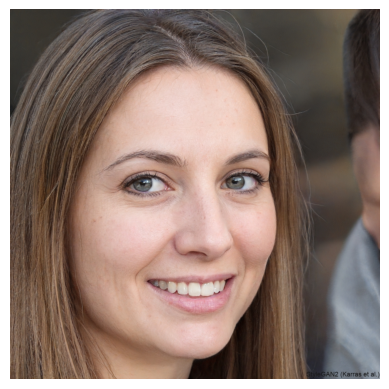

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from queue import Queue

%reload_ext autoreload
%autoreload 2
%matplotlib inline

image = cv2.imread("pessoa6.jpeg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
import cv2
from tqdm import tqdm
from queue import Queue

# Functions For Skin Based Thresholding
def RGB_Threshold(bgr):
    b = float(bgr[0])
    g = float(bgr[1])
    r = float(bgr[2])

    # Critérios para detectar pixels de pele em RGB
    E1 = r > 95 and g > 40 and b > 20 and (r > g) and (r > b) and (abs(r - g) > 15) and (bgr[3] > 15)
    return E1

def YCrCb_Threshold(yCrCb):
    y = float(yCrCb[0])
    Cr = float(yCrCb[1])
    Cb = float(yCrCb[2])

    # Critérios para detectar pixels de pele em YCrCb
    E1 = Cr > 135
    E2 = Cb > 85
    E3 = y > 80
    E4 = Cr <= (1.5862 * Cb + 20)
    E5 = Cr >= (0.3448 * Cb + 76.2069)
    E6 = Cr >= (-4.5652 * Cb + 234.5652)
    E7 = Cr <= (-1.15 * Cb + 301.75)
    E8 = Cr <= (-2.2857 * Cb + 432.85)

    return E1 and E2 and E3 and E4 and E5 and E6 and E7 and E8

def HSV_Threshold(hsv):
    h = float(hsv[0])
    s = float(hsv[1])

    # Critérios para detectar pixels de pele em HSV
    return (0 <= h <= 50) and (0.23 <= s <= 0.68)

def Threshold(bgra, hsv, yCrCb):
    # Aplicando as três verificações de thresholding para os diferentes espaços de cores
    return RGB_Threshold(bgra) or HSV_Threshold(hsv) or YCrCb_Threshold(yCrCb)


In [ ]:
def SkinSegmentation(img, imgNameOut="out.png"):
    result = np.copy(img)
    bgra = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV_FULL)
    hsv = cv2.normalize(hsv, None, 0.0, 255.0, cv2.NORM_MINMAX, cv2.CV_32FC3)
    yCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

    for i in tqdm(range(img.shape[0])):
        for j in range(img.shape[1]):
            if not Threshold(bgra[i, j], hsv[i, j], yCrCb[i, j]):
                result[i, j, 0] = 0
                result[i, j, 1] = 0
                result[i, j, 2] = 0

    cv2.imwrite(imgNameOut, result)

(1024, 1024, 3)


100%|██████████| 1024/1024 [00:04<00:00, 254.27it/s]


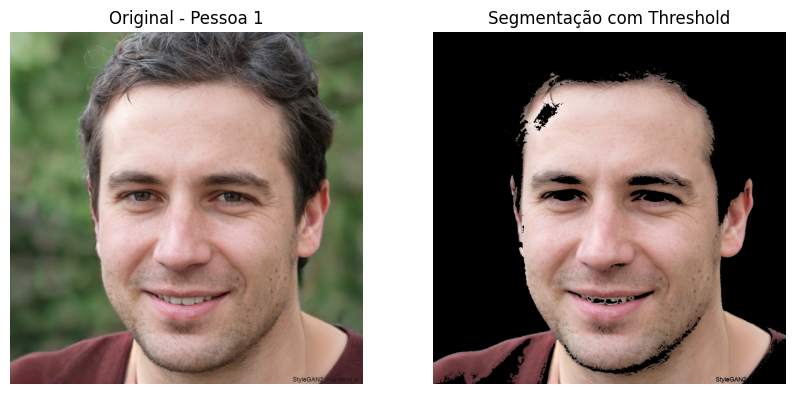

(1024, 1024, 3)


100%|██████████| 1024/1024 [00:05<00:00, 183.46it/s]


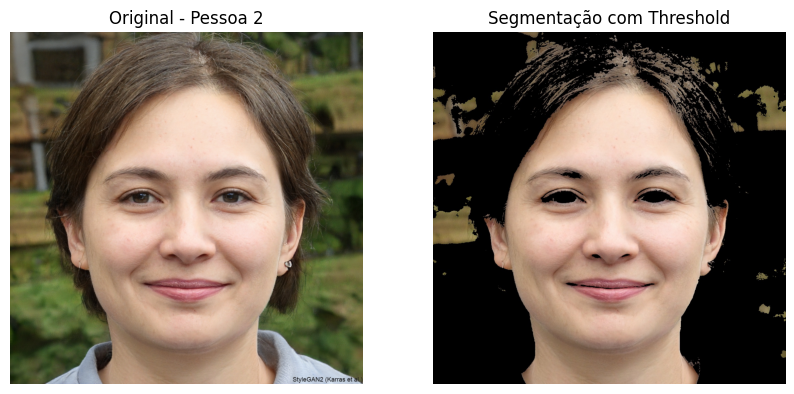

(1024, 1024, 3)


100%|██████████| 1024/1024 [00:06<00:00, 148.77it/s]


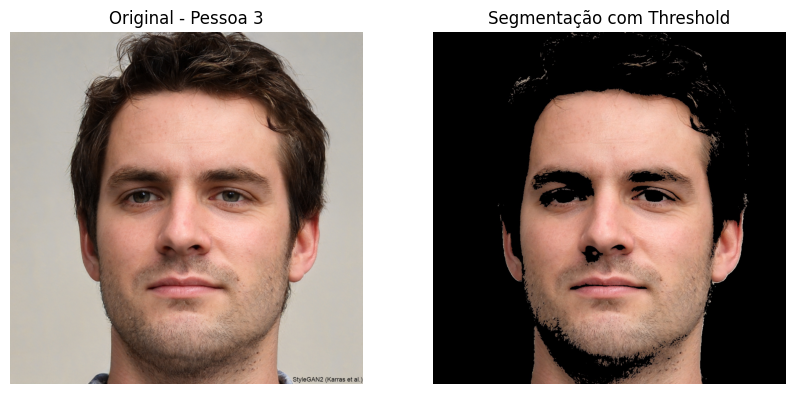

(1024, 1024, 3)


100%|██████████| 1024/1024 [00:08<00:00, 125.48it/s]


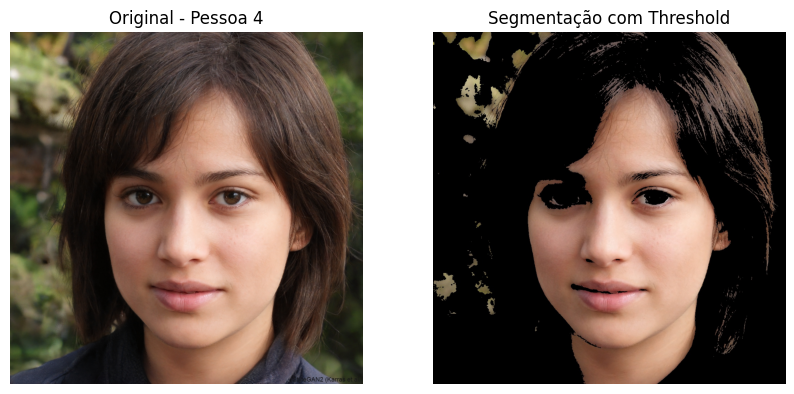

(1024, 1024, 3)


100%|██████████| 1024/1024 [00:09<00:00, 113.35it/s]


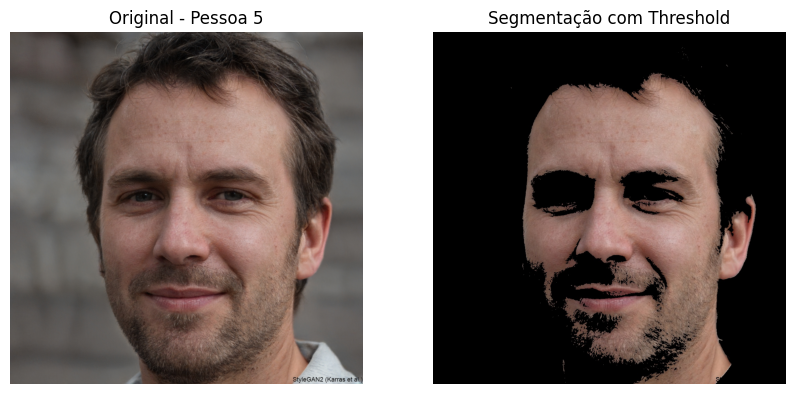

(1024, 1024, 3)


100%|██████████| 1024/1024 [00:04<00:00, 207.86it/s]


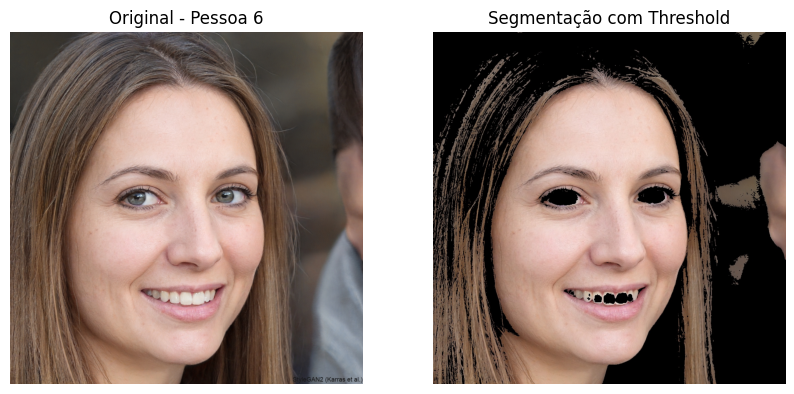

In [ ]:
ImageList = ["pessoa1.jpeg", "pessoa2.jpeg", "pessoa3.jpeg", "pessoa4.jpeg", "pessoa5.jpeg", "pessoa6.jpeg"]
i=0
for it in ImageList:

  img = cv2.imread(ImageList[i])
  print(img.shape)

  SkinSegmentation(img, "out_"+ImageList[i])
  i+=1

  output_image = cv2.imread(f"out_pessoa{i}.jpeg")
  output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

  # Exibir a imagem de saída
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.title(f"Original - Pessoa {i}")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.subplot(1, 2, 2)
  plt.title("Segmentação com Threshold")
  plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()

In [ ]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def KMeans_Segmentation(img, K=2, imgNameOut="out.png"):
    # Redimensiona a imagem para uma lista de pixels no espaço RGB
    img_data = img.reshape((-1, 3))
    img_data = np.float32(img_data)

    # Aplica o K-means no espaço de cores RGB
    kmeans = KMeans(n_clusters=K, random_state=0)
    labels = kmeans.fit_predict(img_data)
    centers = kmeans.cluster_centers_

    # Converte os centros para valores inteiros (valores de cor)
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]

    # Redimensiona de volta para a forma original
    segmented_image = segmented_data.reshape((img.shape))

    return segmented_image


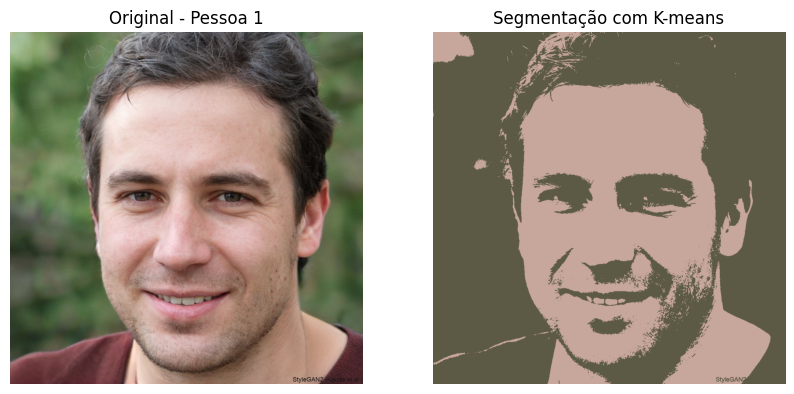

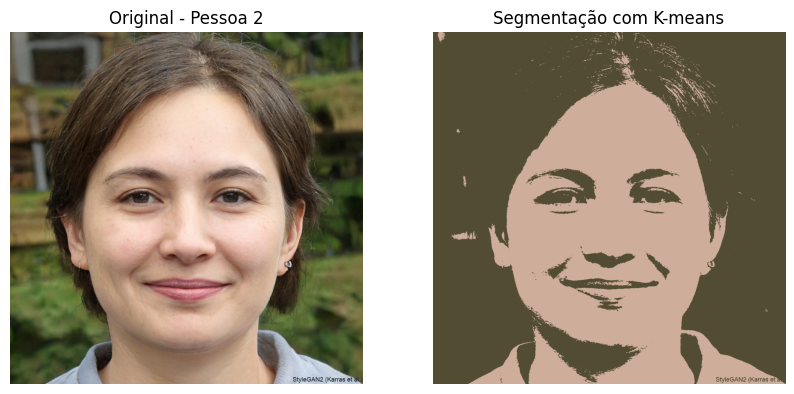

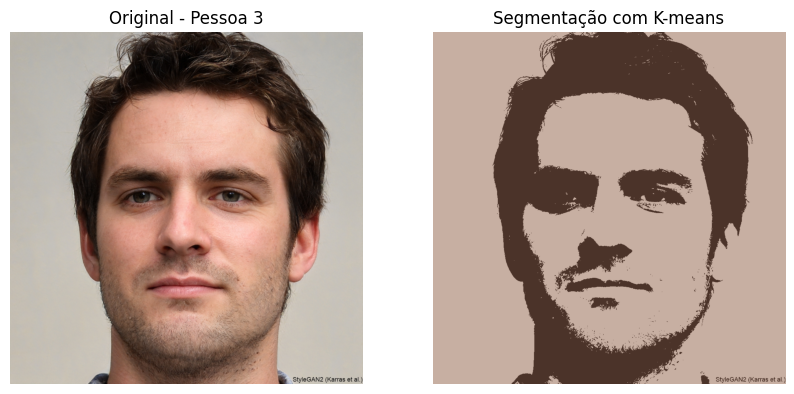

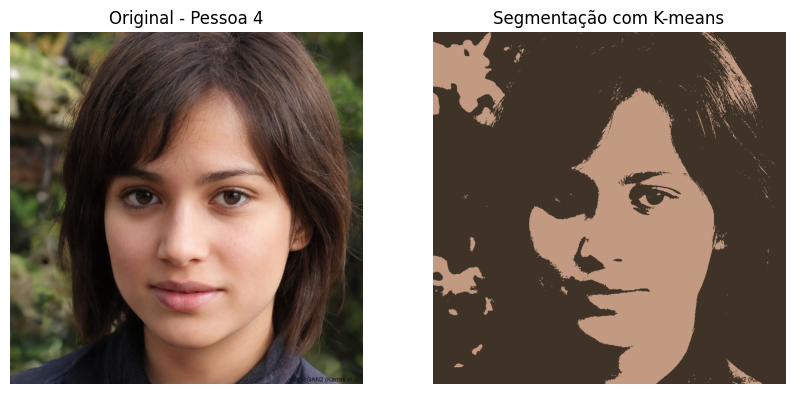

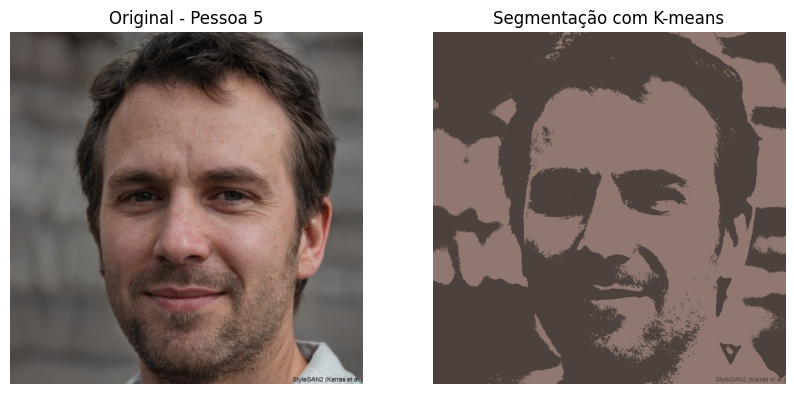

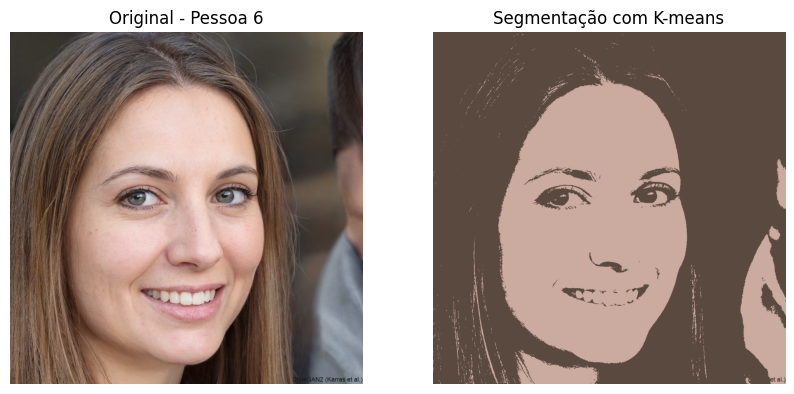

In [ ]:
# Carregar imagem e aplicar K-means
ImageList = ["pessoa1.jpeg", "pessoa2.jpeg" , "pessoa3.jpeg", "pessoa4.jpeg", "pessoa5.jpeg", "pessoa6.jpeg"]
i=0
for it in ImageList:
  img = cv2.imread(ImageList[i])
  segmented_image = KMeans_Segmentation(img, K=2)
  i+=1
  cv2.imwrite(f"seg_pessoa{i}.jpeg", segmented_image)
  # Mostrar imagem original e segmentada
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.title(f"Original - Pessoa {i}")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.subplot(1, 2, 2)
  plt.title("Segmentação com K-means")
  plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()


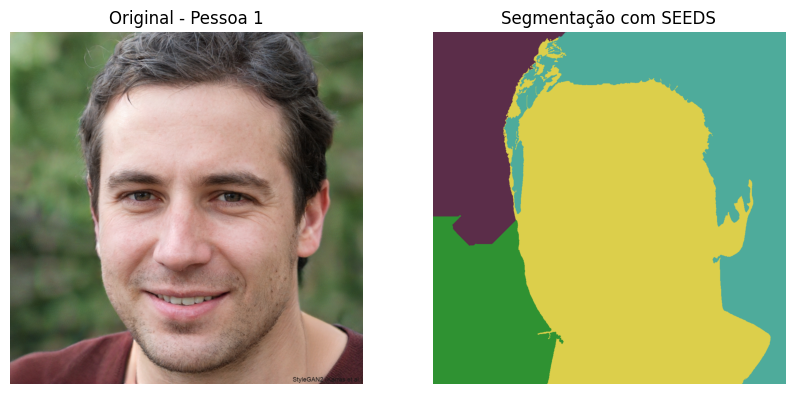

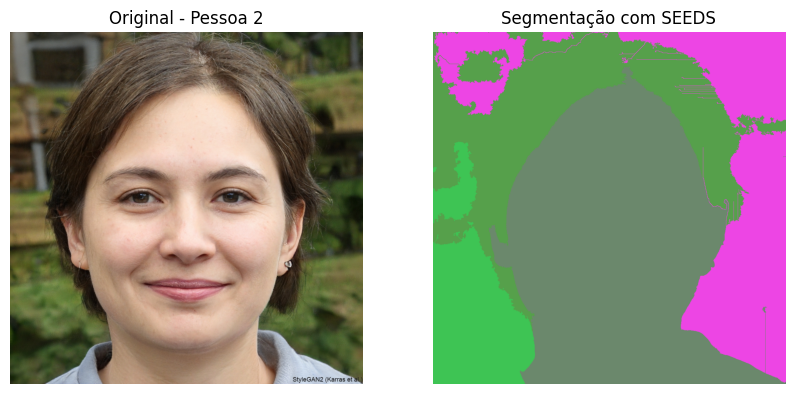

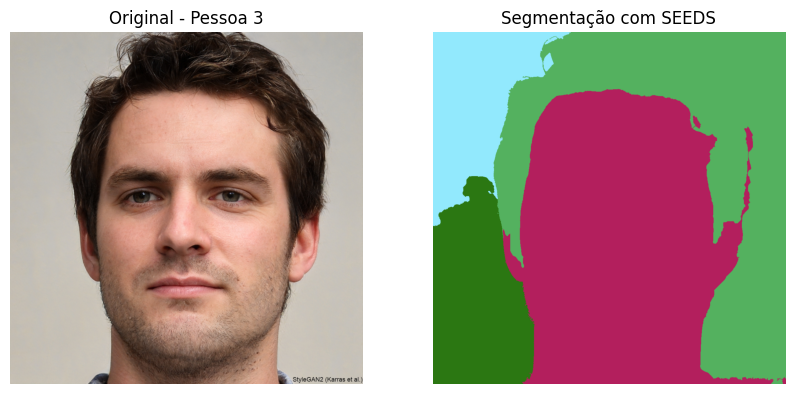

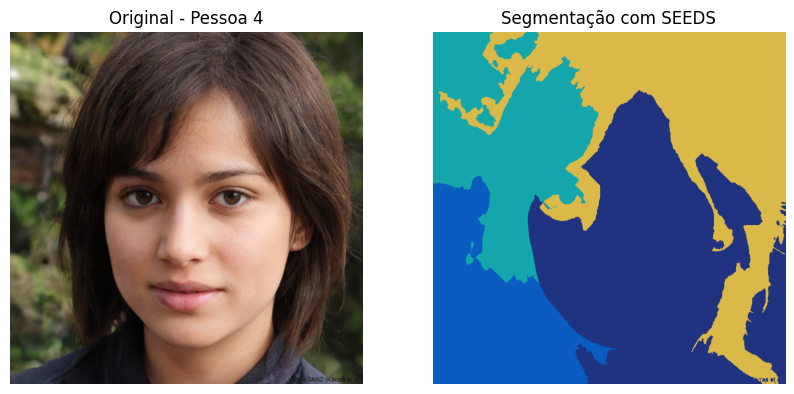

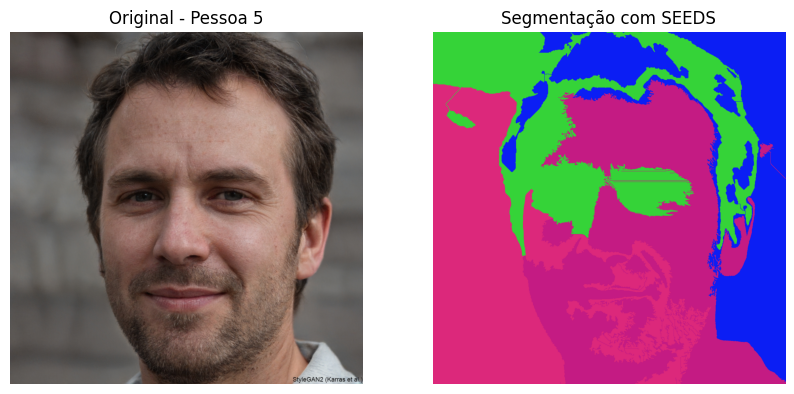

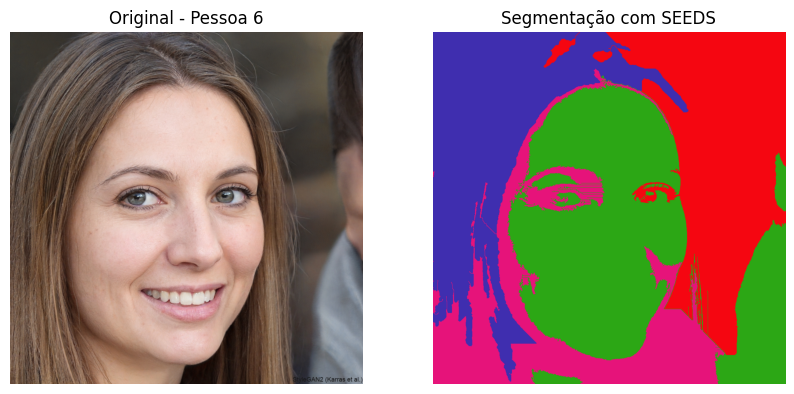

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import cv2
import numpy as np

def SEEDS_Segmentation(img, num_superpixels=5, num_levels=6, prior=2, num_histogram_bins=6, num_iterations=1000):
    # Converte a imagem para o espaço de cores LAB, pois SEEDS funciona melhor nesse espaço
    img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)

    # Cria o objeto de segmentação SEEDS
    seeds = cv2.ximgproc.createSuperpixelSEEDS(
        img_lab.shape[1], img_lab.shape[0], img_lab.shape[2],
        num_superpixels, num_levels, prior, num_histogram_bins
    )

    # Roda o SEEDS para calcular os superpixels
    seeds.iterate(img_lab, num_iterations)

    # Gera a máscara para os contornos dos superpixels
    mask = seeds.getLabelContourMask(thick_line=True)
    segmented_image = img.copy()
    segmented_image[mask == 255] = (0, 0, 0)  # Define as bordas dos superpixels em preto

    # Aplica a máscara para mostrar apenas os superpixels
    labels = seeds.getLabels()
    for label in np.unique(labels):
        mask_label = (labels == label).astype(np.uint8)
        color = np.random.randint(0, 255, size=3)  # Cor aleatória para cada superpixel
        segmented_image[mask_label == 1] = color

    return segmented_image



# Lista de imagens para aplicar SEEDS
ImageList = ["pessoa1.jpeg", "pessoa2.jpeg", "pessoa3.jpeg", "pessoa4.jpeg", "pessoa5.jpeg", "pessoa6.jpeg"]

# Loop para aplicar SEEDS em cada imagem da lista e exibir os resultados
for i, image_path in enumerate(ImageList):
    img = cv2.imread(image_path)
    segmented_image = SEEDS_Segmentation(img)

    # Mostrar imagem original e segmentada
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title(f"Original - Pessoa {i+1}")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Segmentação com SEEDS")
    plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()